MAE is: 
0.1112992540636321
MSE is: 
 0.023390905304160256
R^2 is: 
 0.8627547060335368
RMSE is: 
 0.15294085557548134


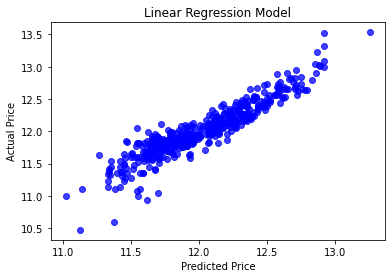

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv('train.csv')

##handling missing value
data = train.select_dtypes(include=[np.number]).interpolate().dropna()
##Build a linear model
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)
##Evaluate the performance and visualize results
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print ('MAE is: \n' + str(mean_absolute_error(y_test, predictions))) # MAE
print ('MSE is: \n ' + str(mean_squared_error(y_test, predictions)) ) # MSE
print ("R^2 is: \n", r2_score(y_test, predictions)) # R2 score

def RMSE(predict, target):
    return np.sqrt(((predict - target) ** 2).mean())
print ('RMSE is: \n', RMSE(y_test, predictions))


##visualize

actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

